In [1]:
quiet_library <- function(...) {
    suppressPackageStartupMessages(library(...))
}
quiet_library(Seurat)
quiet_library(ggplot2)
quiet_library(Matrix)
quiet_library(H5weaver)
quiet_library(dplyr)
quiet_library(viridis)
quiet_library(harmony)
quiet_library(Nebulosa)

In [2]:
t_cells <- readRDS(file = 'aging_t_cells_updated.rds')

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



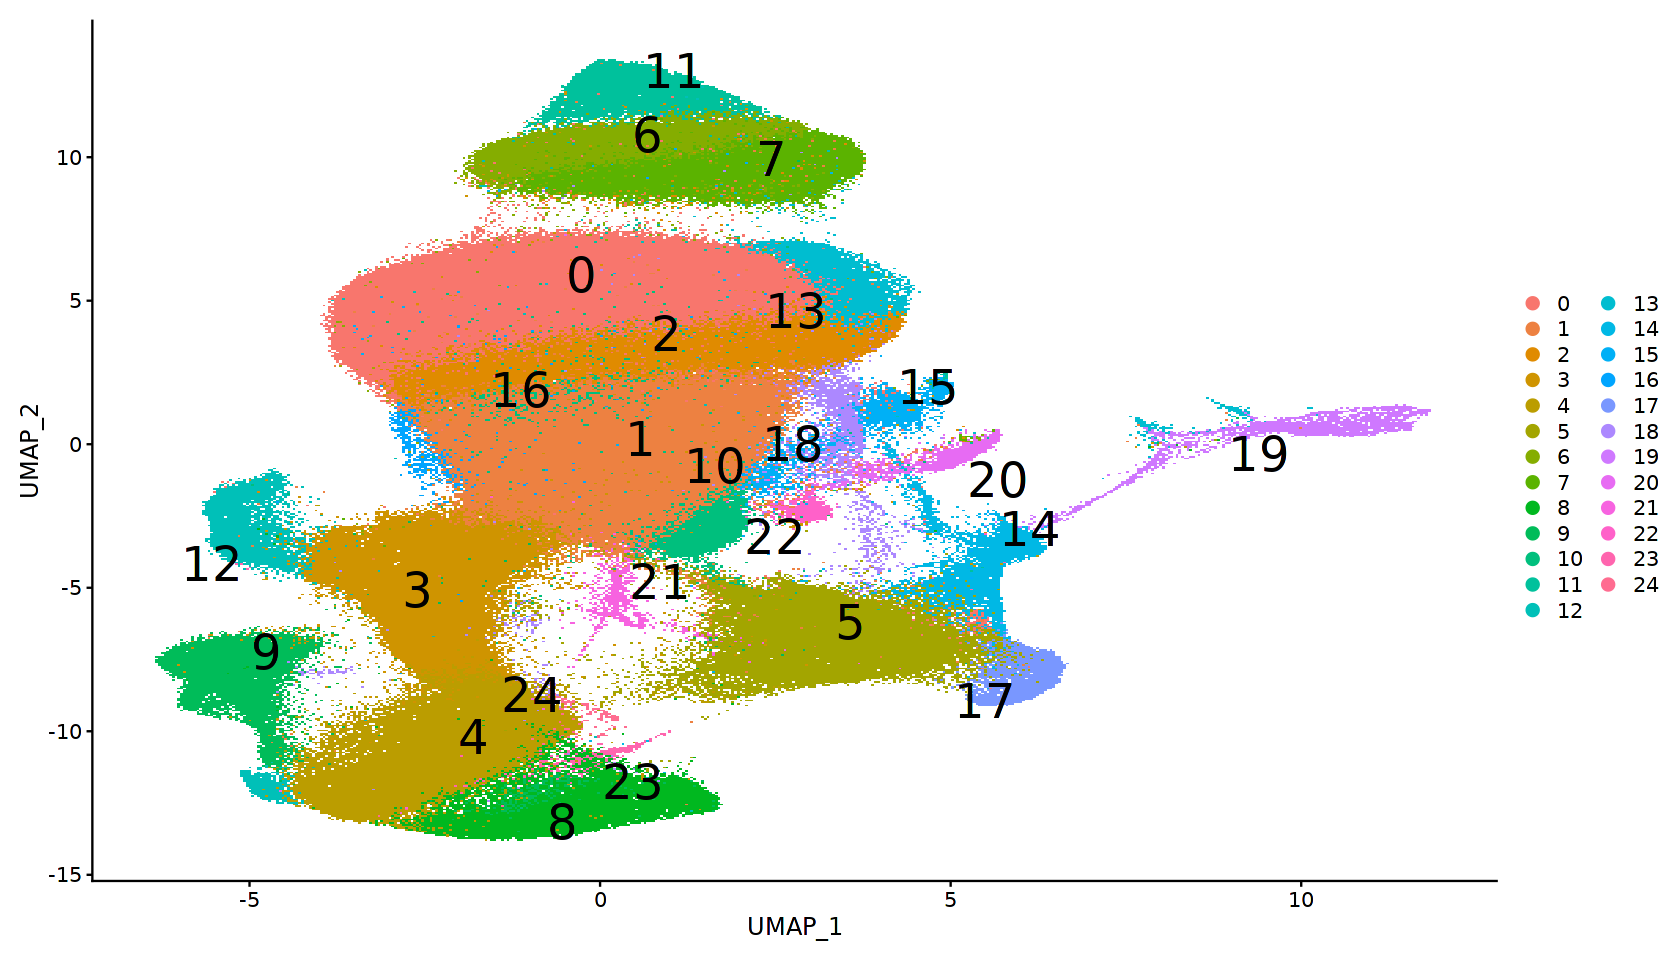

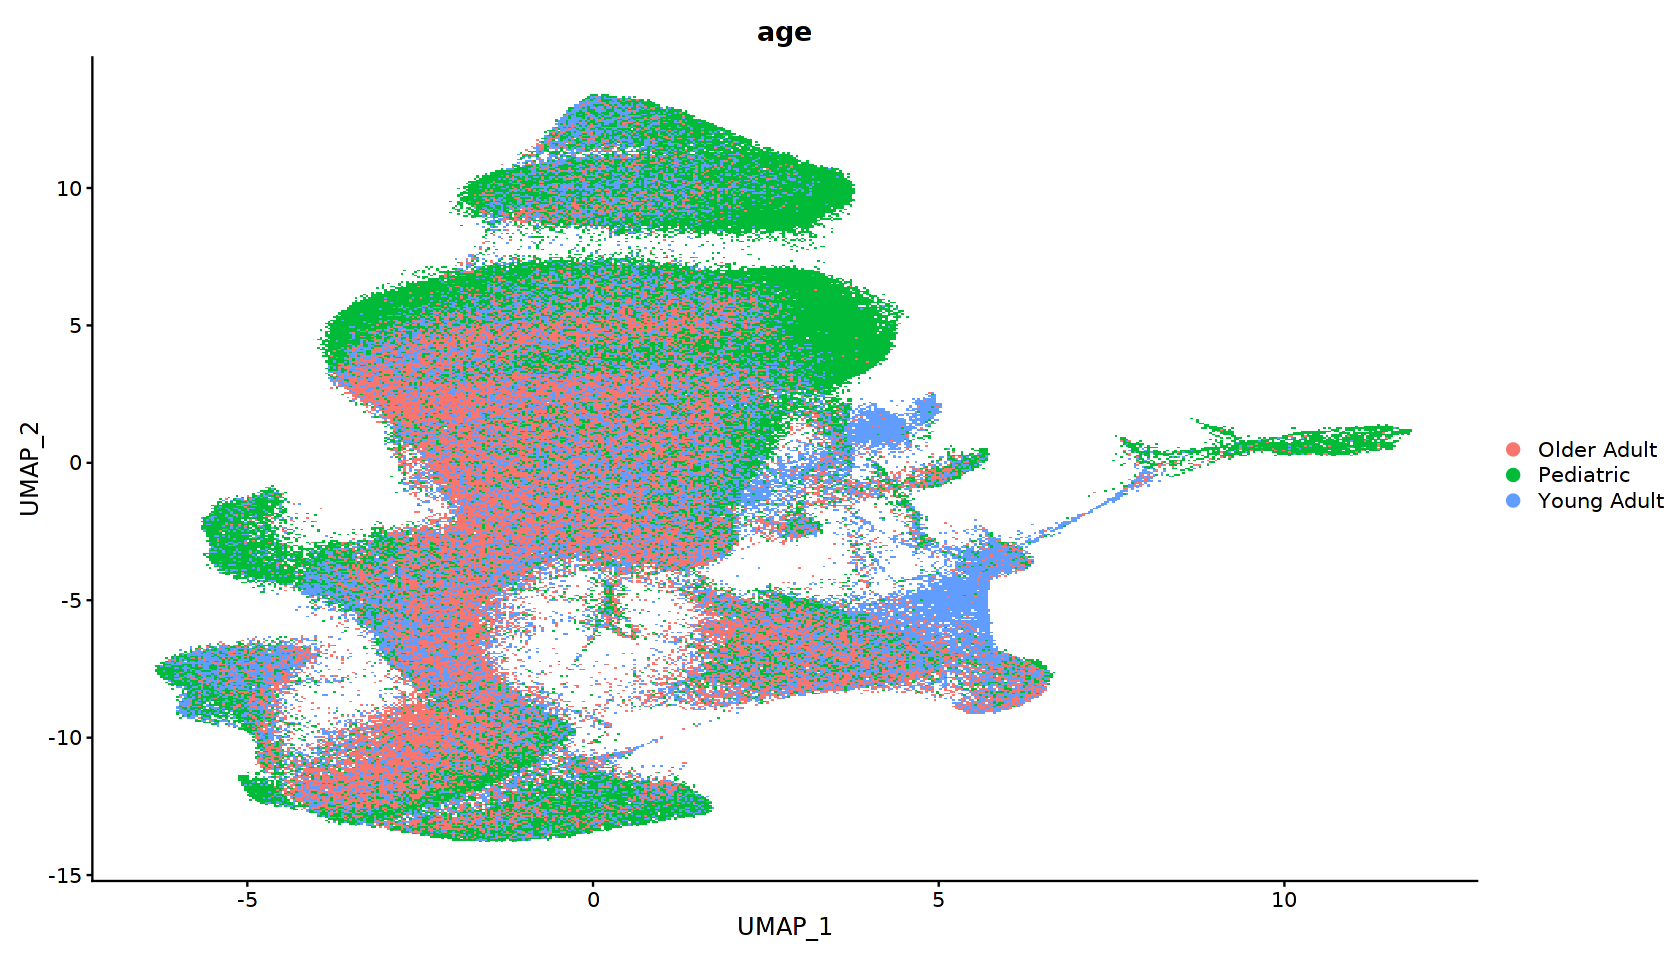

In [3]:
options(repr.plot.width = 14, repr.plot.height = 8)
DimPlot(t_cells, label = TRUE, repel = TRUE, label.size = 10)
DimPlot(t_cells, group.by = 'age', shuffle = TRUE)

In [4]:
DefaultAssay(t_cells) <- 'RNA'
t_cells <- NormalizeData(t_cells)

In [5]:
t_cells[["percent.mt"]] <- PercentageFeatureSet(t_cells, pattern = "^MT-")

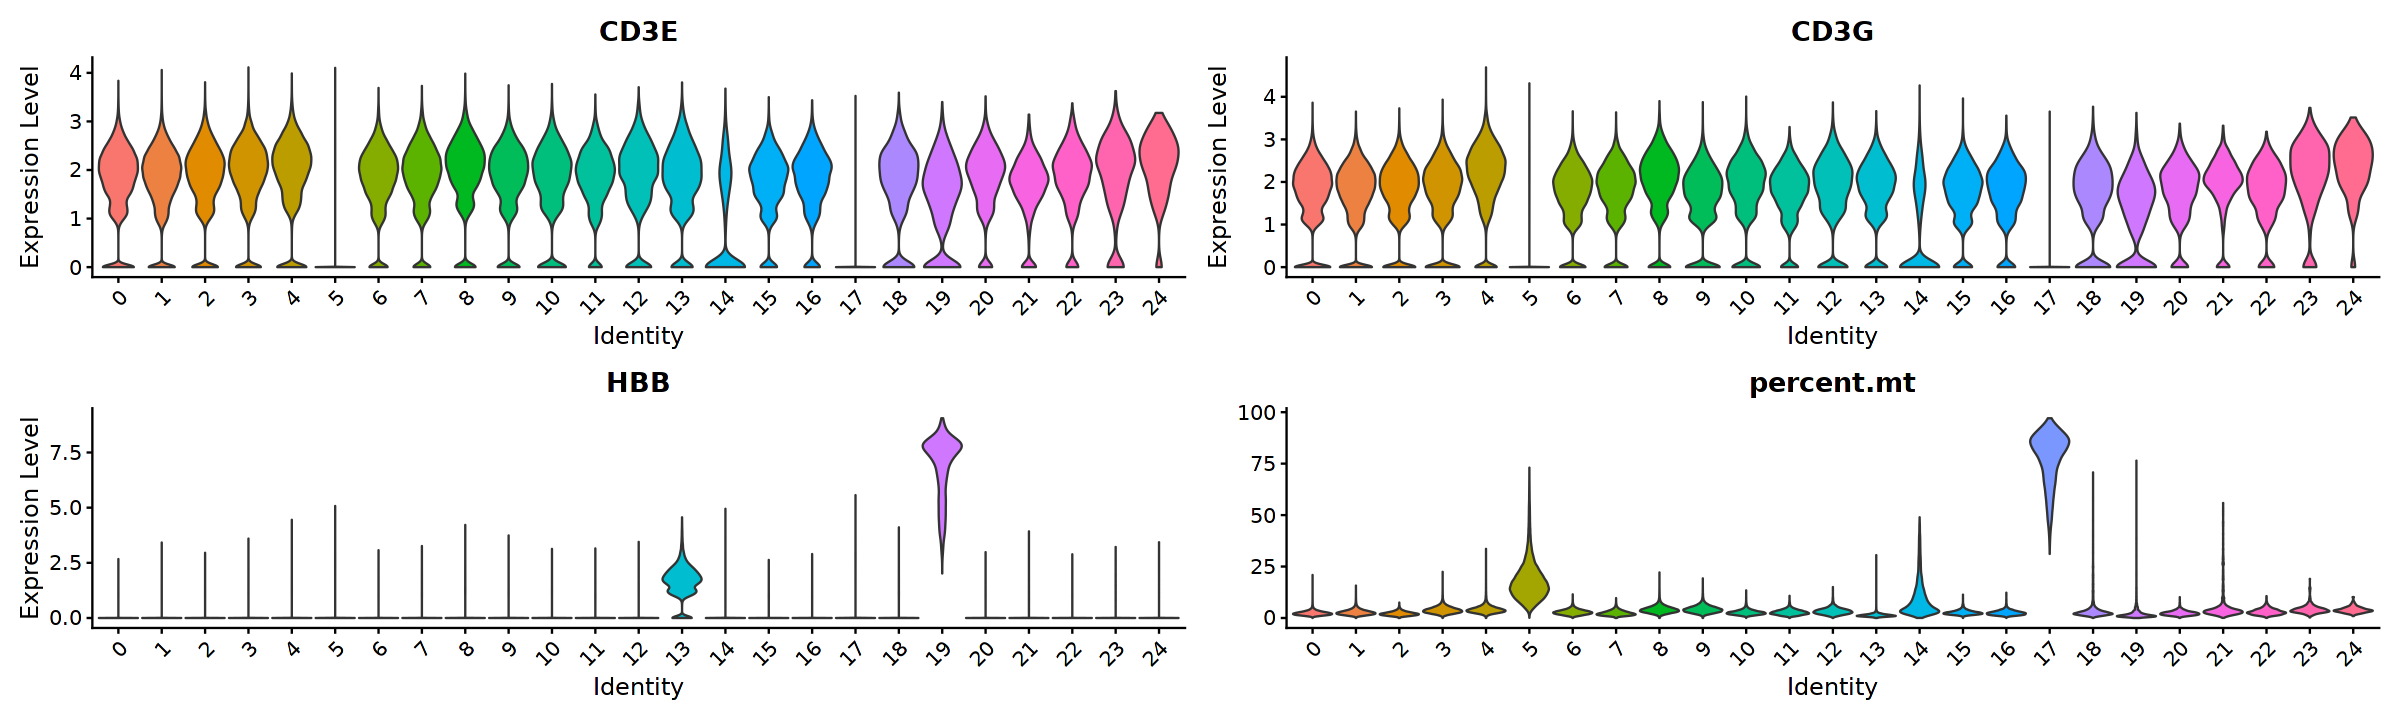

In [6]:
options(repr.plot.width = 20, repr.plot.height = 6)
VlnPlot(t_cells, features = c('CD3E','CD3G','HBB','percent.mt'), pt.size=0, ncol = 2)

Let's drop outlier clusters: \
5, 14 & 17 for low of CD3 expression \
17 for high MT gene expression \
19 for high HBB expression 

In [7]:
clean_t <- subset(t_cells, idents = c(5, 14, 17, 19), invert = TRUE)

In [8]:
clean_t <- suppressWarnings(SCTransform(clean_t, conserve.memory = TRUE)) %>% RunPCA()

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 24406 by 541803

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells



  |======================================================================| 100%


Found 58 outliers - those will be ignored in fitting/regularization step


Skip calculation of full residual matrix

Will not return corrected UMI because residual type is not set to 'pearson'

Calculating gene attributes

Wall clock passed: Time difference of 5.036564 mins

Setting min_variance to:  -Inf

Calculating variance for residuals of type pearson for 24406 genes



  |======================================================================| 100%


Determine variable features

Setting min_variance to:  -Inf

Calculating residuals of type pearson for 3000 genes



  |======================================================================| 100%


Computing corrected UMI count matrix



  |======================================================================| 100%


Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT

PC_ 1 
Positive:  GNLY, NKG7, CCL5, GZMH, CST7, GZMA, GZMB, FGFBP2, S100A4, KLRD1 
	   CCL4, TRDC, B2M, PRF1, CTSW, TRGC2, PLEK, EFHD2, GZMK, HOPX 
	   SH3BGRL3, IL32, FCGR3A, LGALS1, ZEB2, DUSP2, MT-CO1, HCST, TRGC1, KLRG1 
Negative:  RPS12, RPS8, RPL32, RPL13, RPL34, EEF1A1, RPS3A, RPL30, TPT1, RPL10 
	   RPL11, RPLP1, RPS13, RPS18, RPS23, RPL39, RPS27, RPL21, LTB, RPS28 
	   RPS27A, RPS6, RPS14, RPL23, RPL37, RPL19, RPS15A, RPL12, RPS20, RPS29 
PC_ 2 
Positive:  GNLY, RPS12, RPL32, RPL30, RPL34, RPS8, RPS3A, RPS23, RPL10, RPS27 
	   RPS13, RPS27A, RPS14, RPL39, RPL11, GZMB, RPL13, RPS28, RPL21, RPL19 
	   RPS15A, TPT1, RPS18, EEF1A1, RPL37, RPL41, RPLP1, RPS6, RPS21, RPL12 
Negative:  GZMK, CCL5, KLRB1, S100A4, MKI67, GZMA, IL32, TOP2A, DUSP2, TYMS 
	   HIST1H3G, HIST1H1B, MT-CO1, B2M, UBE2C, ASPM, PCLAF, NUSAP1, SYNE2, BIRC5 
	   ANXA1, MT-CO3, DLGAP5, JUN, RRM2, CMC1, CST7, AHNAK, FOS, HI

In [9]:
clean_t <- RunUMAP(clean_t, dims=1:40) %>% FindNeighbors(dims=1:40) %>% FindClusters(resolution=0.5)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
17:57:48 UMAP embedding parameters a = 0.9922 b = 1.112

17:57:49 Read 541803 rows and found 40 numeric columns

17:57:49 Using Annoy for neighbor search, n_neighbors = 30

17:57:49 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:59:38 Writing NN index file to temp file /tmp/RtmpnEI4aE/file1a2fb6c167381

17:59:38 Searching Annoy index using 1 thread, search_k = 3000

18:05:42 Annoy recall = 100%

18:05:48 Commencing smooth kNN distance calibration using 1 thread

18:06:24 Initializing 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 541803
Number of edges: 12436677

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9095
Number of communities: 46
Elapsed time: 1288 seconds


22 singletons identified. 24 final clusters.



Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



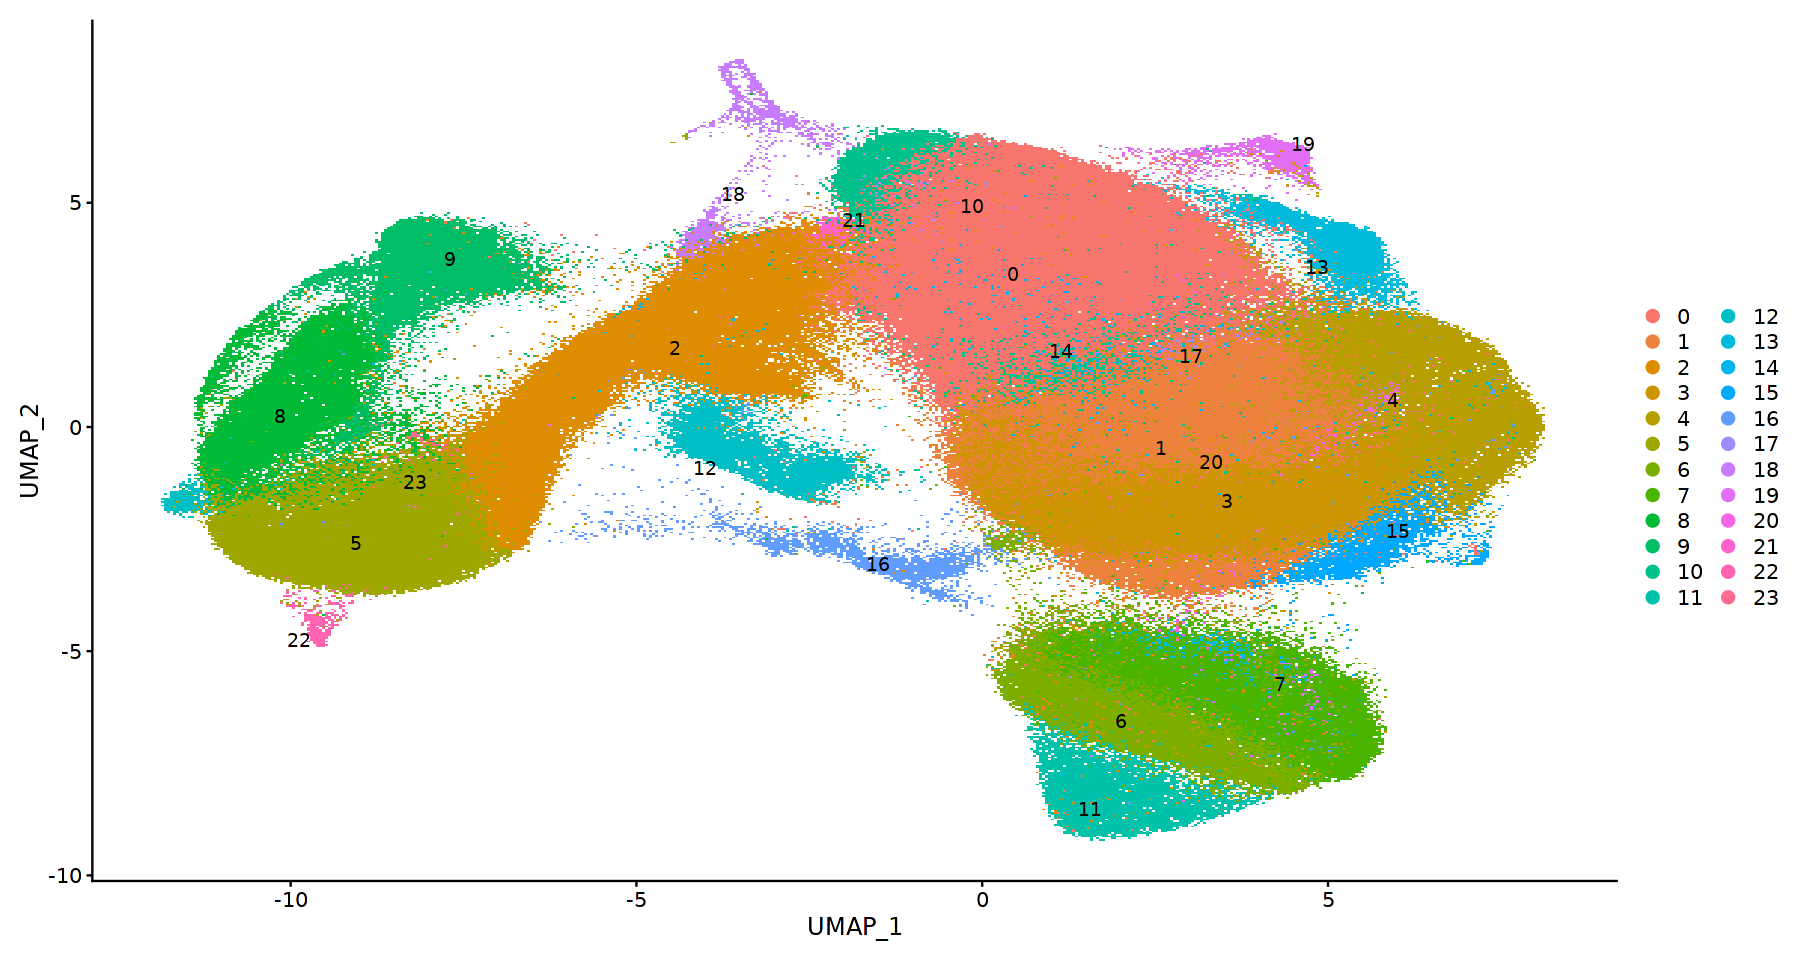

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



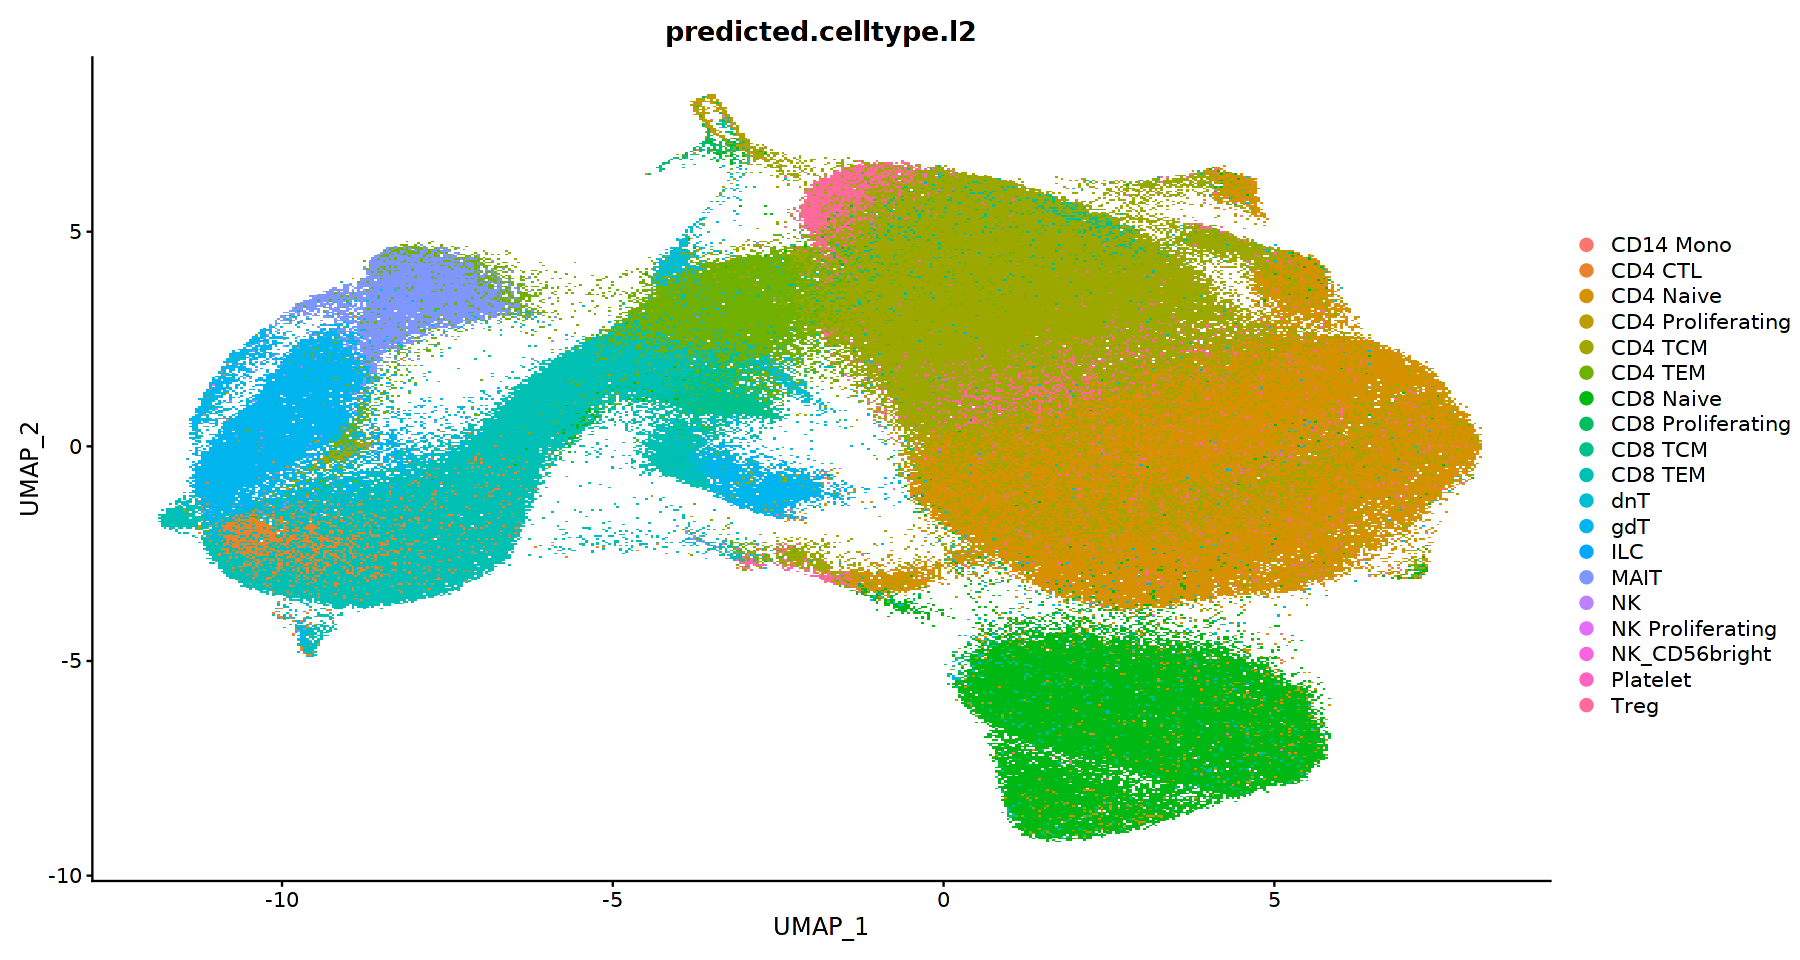

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



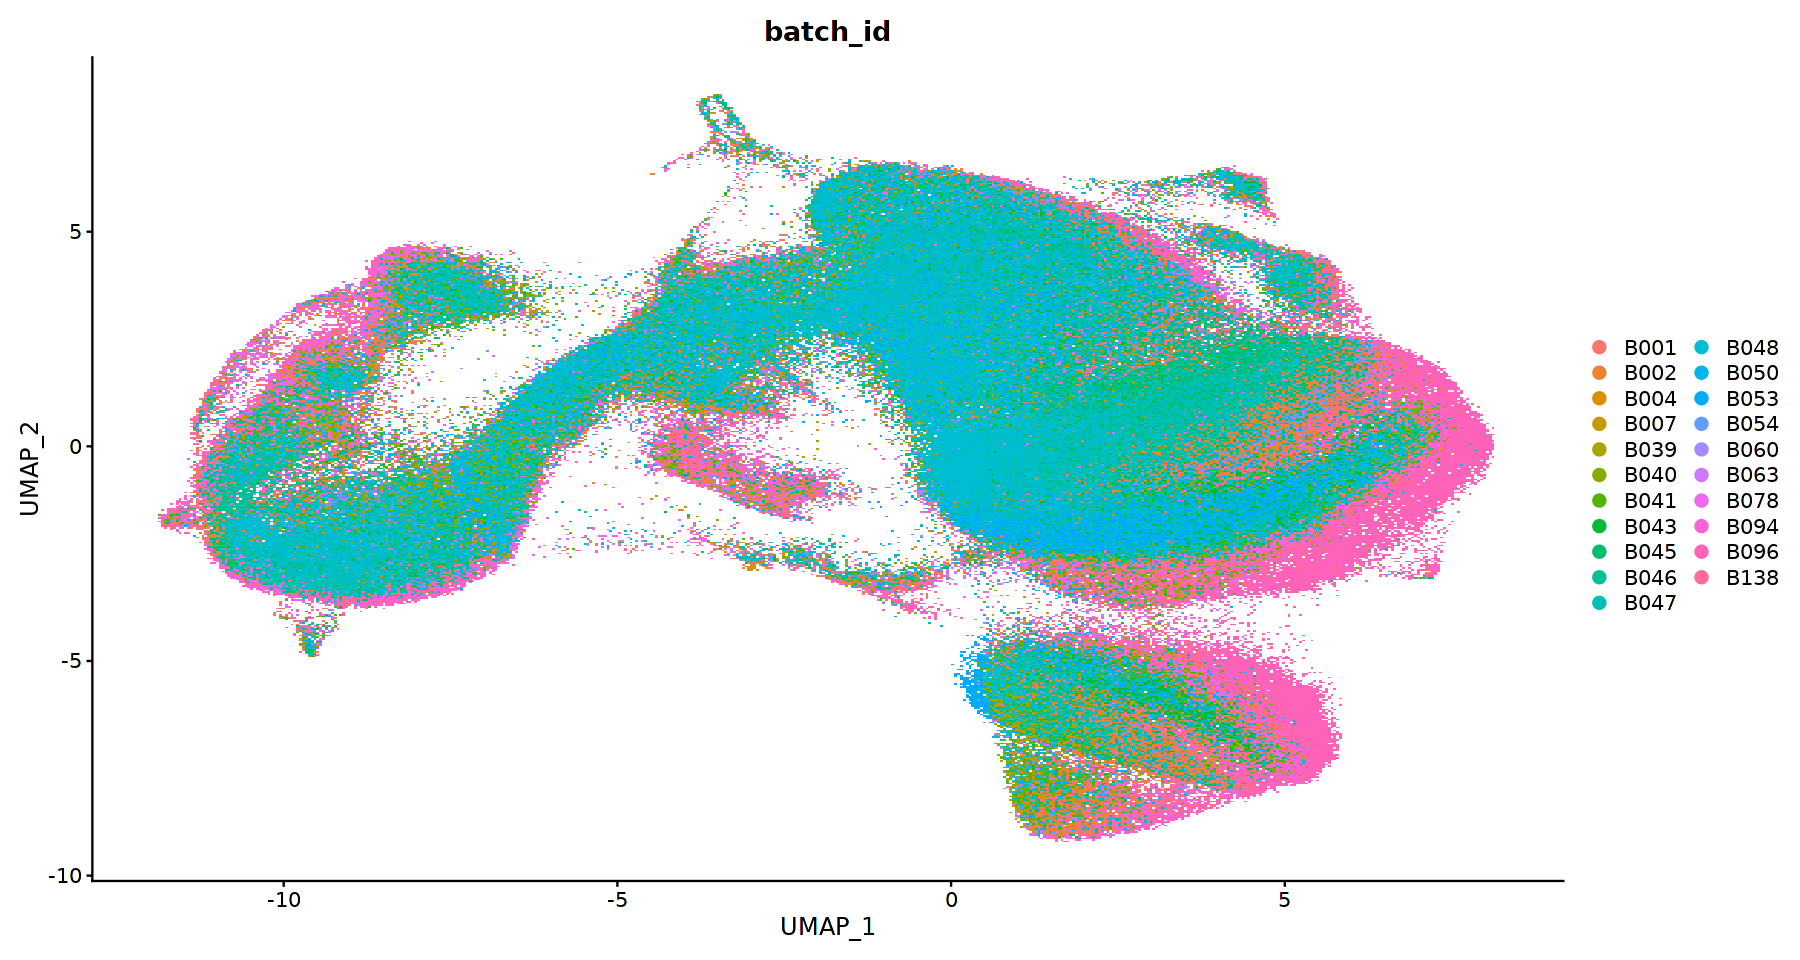

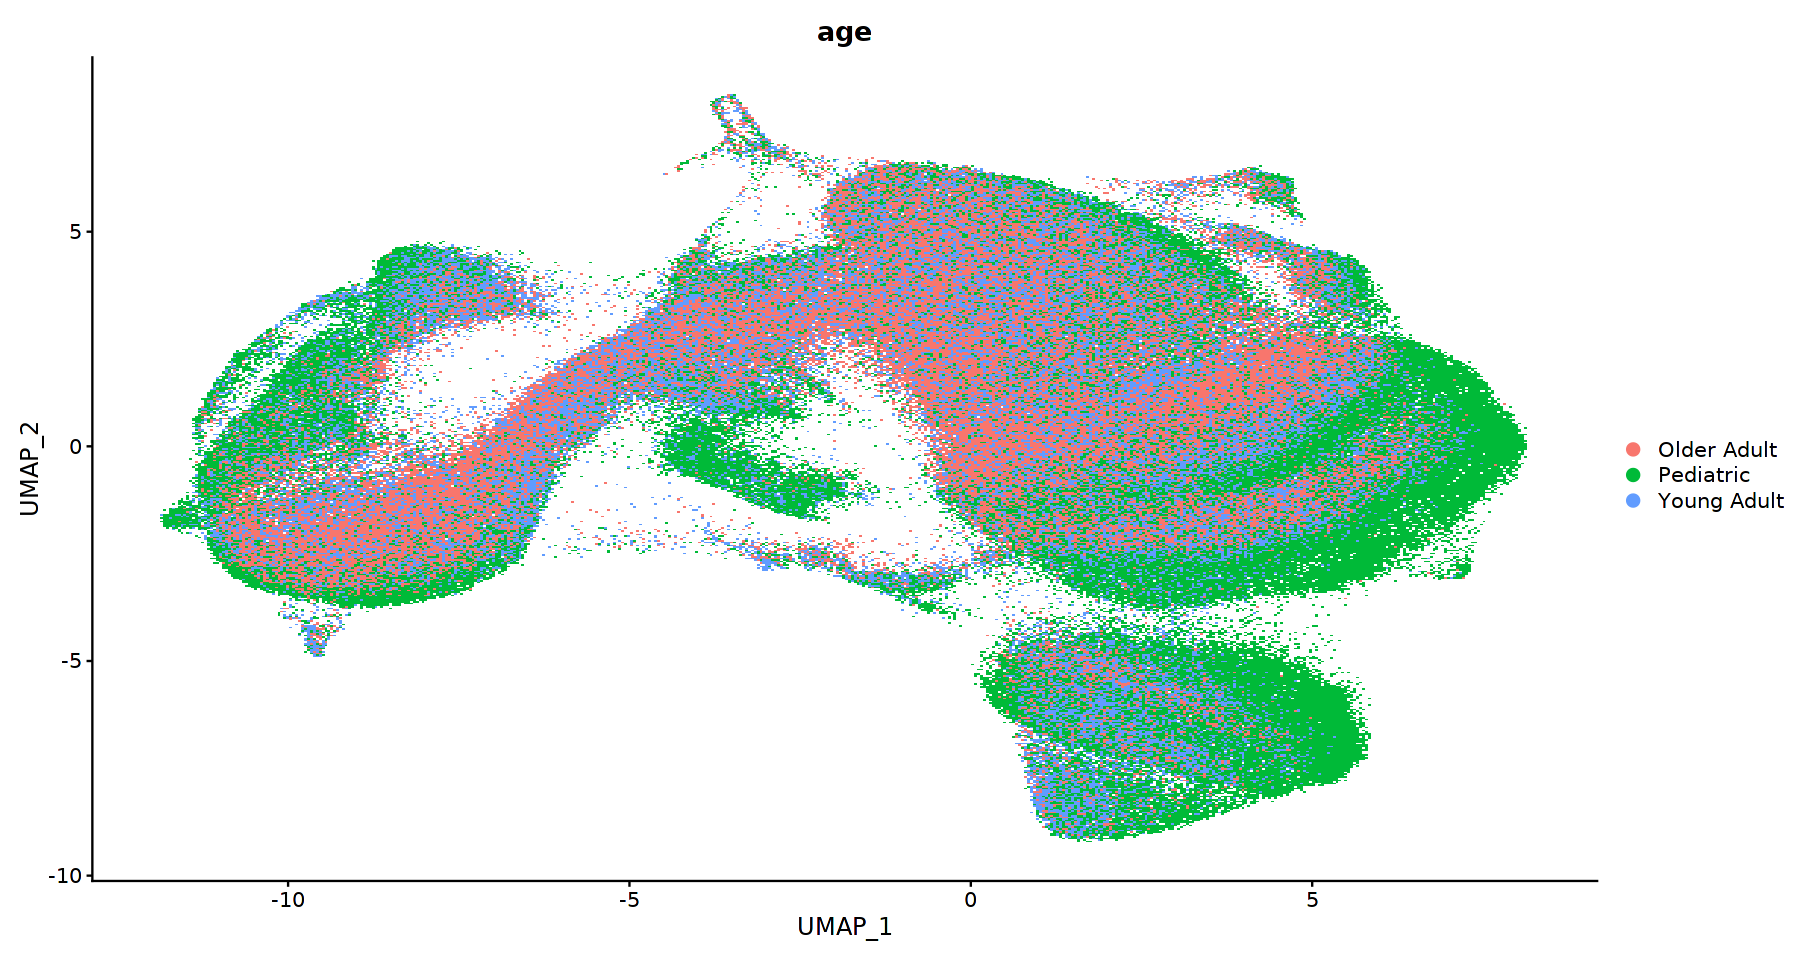

In [10]:
options(repr.plot.width = 15, repr.plot.height = 8)
DimPlot(clean_t, label = TRUE, repel = TRUE)
DimPlot(clean_t, group.by = 'predicted.celltype.l2')
DimPlot(clean_t, group.by = 'batch_id')
DimPlot(clean_t, group.by = 'age', shuffle = TRUE)

In [ ]:
saveRDS(clean_t, file = 'clean_aging_t_cells.rds')

In [ ]:
sessionInfo()